In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!find /content -type d -name 'save*' -exec rm -r {} \;

^C


In [ ]:
# 0으로 시작하는 파일 제거
!find /content/drive/MyDrive/testset/example -type d -name '0*' -exec rm -r {} \;

In [ ]:
# 압축 해제
for i in range(1, 9):
  !unzip /content/drive/MyDrive/testset/"$0$i".zip -d /content/drive/MyDrive/testset/example/"$i"


In [ ]:
import os
import shutil
import pandas as pd
import chardet  # 필요한 라이브러리 추가
import csv

# 파일의 인코딩 확인
def get_file_encoding(file_path):
    rawdata = open(file_path, 'rb').read()
    result = chardet.detect(rawdata)
    return result['encoding']


for i in range(1, 7):
    for root, dirs, files in os.walk(f'/content/drive/MyDrive/testset/example/{i}'):
        for dir in dirs:
            for a in range(0, 10):
                if dir.endswith(str(a)):
                    source_path = os.path.join(root, dir, 'PRT_000001_L1.jpg')
                    if os.path.exists(source_path):
                        file_path = os.path.join(root, dir, 'DefectResult.csv')
                        file_encoding = get_file_encoding(file_path)

                        data = pd.read_csv(file_path, encoding=file_encoding)

                        if not data.empty:
                            value_at_1_1 = data.iloc[0, 0]  # 1행 1열

                        else:
                            with open(file_path, 'r', encoding=file_encoding) as csvfile:
                                csv_reader = csv.reader(csvfile)

                                # 첫 번째 줄 읽기
                                first_row = next(csv_reader)

                                value_at_7 = first_row[6]



                        if value_at_1_1 == '정상' or value_at_7 == '정상':
                            destination_folder = '/content/drive/MyDrive/testset/Images/normal'
                        else:
                            destination_folder = '/content/drive/MyDrive/testset/Images/abnormal'

                        # 대상 폴더 생성
                        if not os.path.exists(destination_folder):
                            os.makedirs(destination_folder)

                        j = dir[:-1]
                        destination_path = os.path.join(destination_folder, f'{i}_{j}{a}.jpg')

                        # 이미지 파일 복사
                        shutil.copy(source_path, destination_path)
                        print(f"Copied {source_path} to {destination_path}")



In [ ]:
!rm -r /content/drive/MyDrive/testset/Images4

In [2]:
import os
import shutil
import pandas as pd
import chardet
import csv
import tensorflow as tf
from PIL import Image

# 파일의 인코딩 확인
def get_file_encoding(file_path):
    rawdata = open(file_path, 'rb').read()
    result = chardet.detect(rawdata)
    return result['encoding']

# 이미지 데이터 전처리 함수 정의
def preprocess_image(image):
    image = tf.image.resize_with_pad(image, target_height=512, target_width=512)
    image = tf.cast(image, tf.float32) / 255.0
    return image


for i in range(1, 9):
    for root, dirs, files in os.walk(f'/content/drive/MyDrive/testset/example/{i}'):
        for dir in dirs:
            for a in range(0, 10):
                if dir.endswith(str(a)):
                    source_path = os.path.join(root, dir, 'PRT_000001_L1.jpg')
                    if os.path.exists(source_path):
                        file_path = os.path.join(root, dir, 'DefectResult.csv')
                        file_encoding = get_file_encoding(file_path)

                        data = pd.read_csv(file_path, encoding=file_encoding)

                        if not data.empty:
                            value_at_1_1 = data.iloc[0, 0]  # 1행 1열
                            value_at_7 = None  # value_at_7 초기화
                        else:
                            value_at_1_1 = None
                            with open(file_path, 'r', encoding=file_encoding) as csvfile:
                                csv_reader = csv.reader(csvfile)
                                # 첫 번째 줄 읽기
                                first_row = next(csv_reader)
                                value_at_7 = first_row[6]

                        # 대상 폴더 설정
                        if value_at_1_1 == '정상' or value_at_7 == '정상':
                            destination_folder = '/content/drive/MyDrive/testset/Images5/normal'
                        else:
                            destination_folder = '/content/drive/MyDrive/testset/Images5/abnormal'

                        # 대상 폴더 생성
                        if not os.path.exists(destination_folder):
                            os.makedirs(destination_folder)

                        j = dir[:-1]
                        destination_path = os.path.join(destination_folder, f'{i}_{j}{a}.jpg')

                        # 이미지 파일 복사 및 전처리
                        try:
                            img = Image.open(source_path)
                            img = tf.convert_to_tensor(img)
                            img = preprocess_image(img)
                            tf.keras.preprocessing.image.save_img(destination_path, img.numpy())
                            print(f"Copied and preprocessed {source_path} to {destination_path}")
                        except Exception as e:
                            print(f"Error processing image: {e}")


Copied and preprocessed /content/drive/MyDrive/testset/example/1/00000159/PRT_000001_L1.jpg to /content/drive/MyDrive/testset/Images5/abnormal/1_00000159.jpg
Copied and preprocessed /content/drive/MyDrive/testset/example/1/00000160/PRT_000001_L1.jpg to /content/drive/MyDrive/testset/Images5/abnormal/1_00000160.jpg
Copied and preprocessed /content/drive/MyDrive/testset/example/1/00000161/PRT_000001_L1.jpg to /content/drive/MyDrive/testset/Images5/normal/1_00000161.jpg
Copied and preprocessed /content/drive/MyDrive/testset/example/1/00000162/PRT_000001_L1.jpg to /content/drive/MyDrive/testset/Images5/abnormal/1_00000162.jpg
Copied and preprocessed /content/drive/MyDrive/testset/example/1/00000163/PRT_000001_L1.jpg to /content/drive/MyDrive/testset/Images5/abnormal/1_00000163.jpg
Copied and preprocessed /content/drive/MyDrive/testset/example/1/00000164/PRT_000001_L1.jpg to /content/drive/MyDrive/testset/Images5/normal/1_00000164.jpg
Copied and preprocessed /content/drive/MyDrive/testset/e

In [ ]:
!pip install chardet

In [3]:
import os

num_skipped = 0
for folder_name in ("abnormal", "normal"):
    folder_path = os.path.join("/content/drive/MyDrive/testset/Images5", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [21]:
image_size = (256, 256)
batch_size = 64

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/testset/Images5",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 4401 files belonging to 2 classes.
Using 3521 files for training.
Using 880 files for validation.


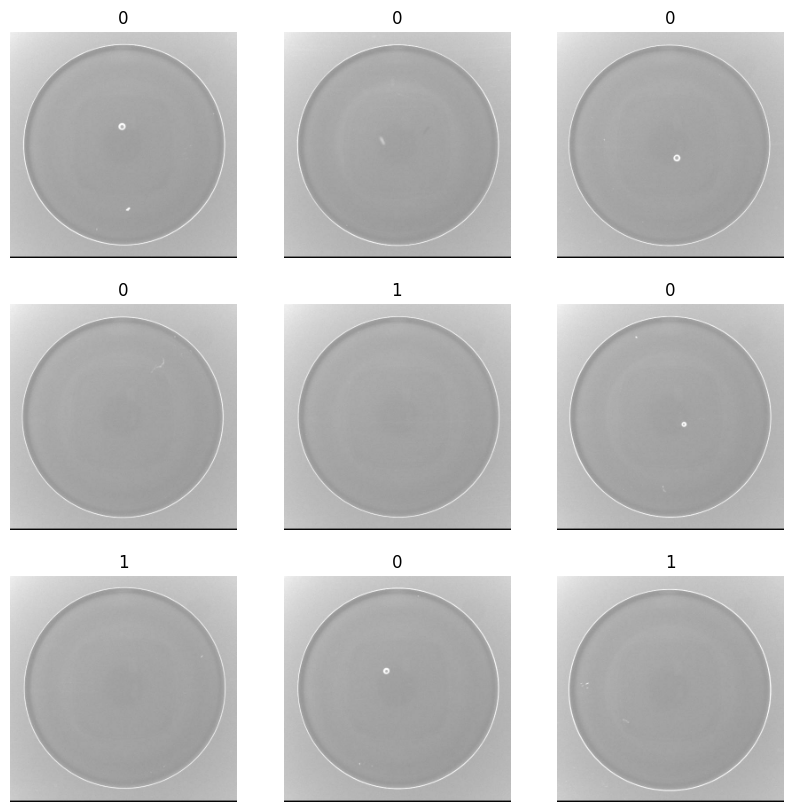

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        try:
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(int(labels[i]))
            plt.axis("off")
        except tf.errors.InvalidArgumentError as e:
            print(f"Error loading image: {e}")


In [23]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
    ]
)

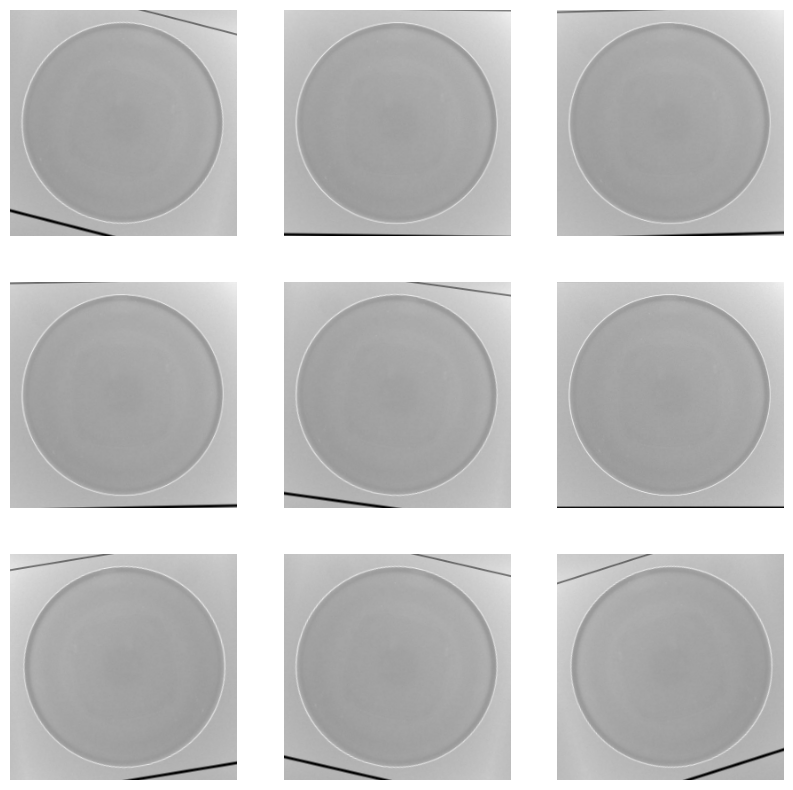

In [24]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [25]:
inputs = keras.Input(shape=image_size)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
...  # Rest of the model

Ellipsis

In [26]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

In [27]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

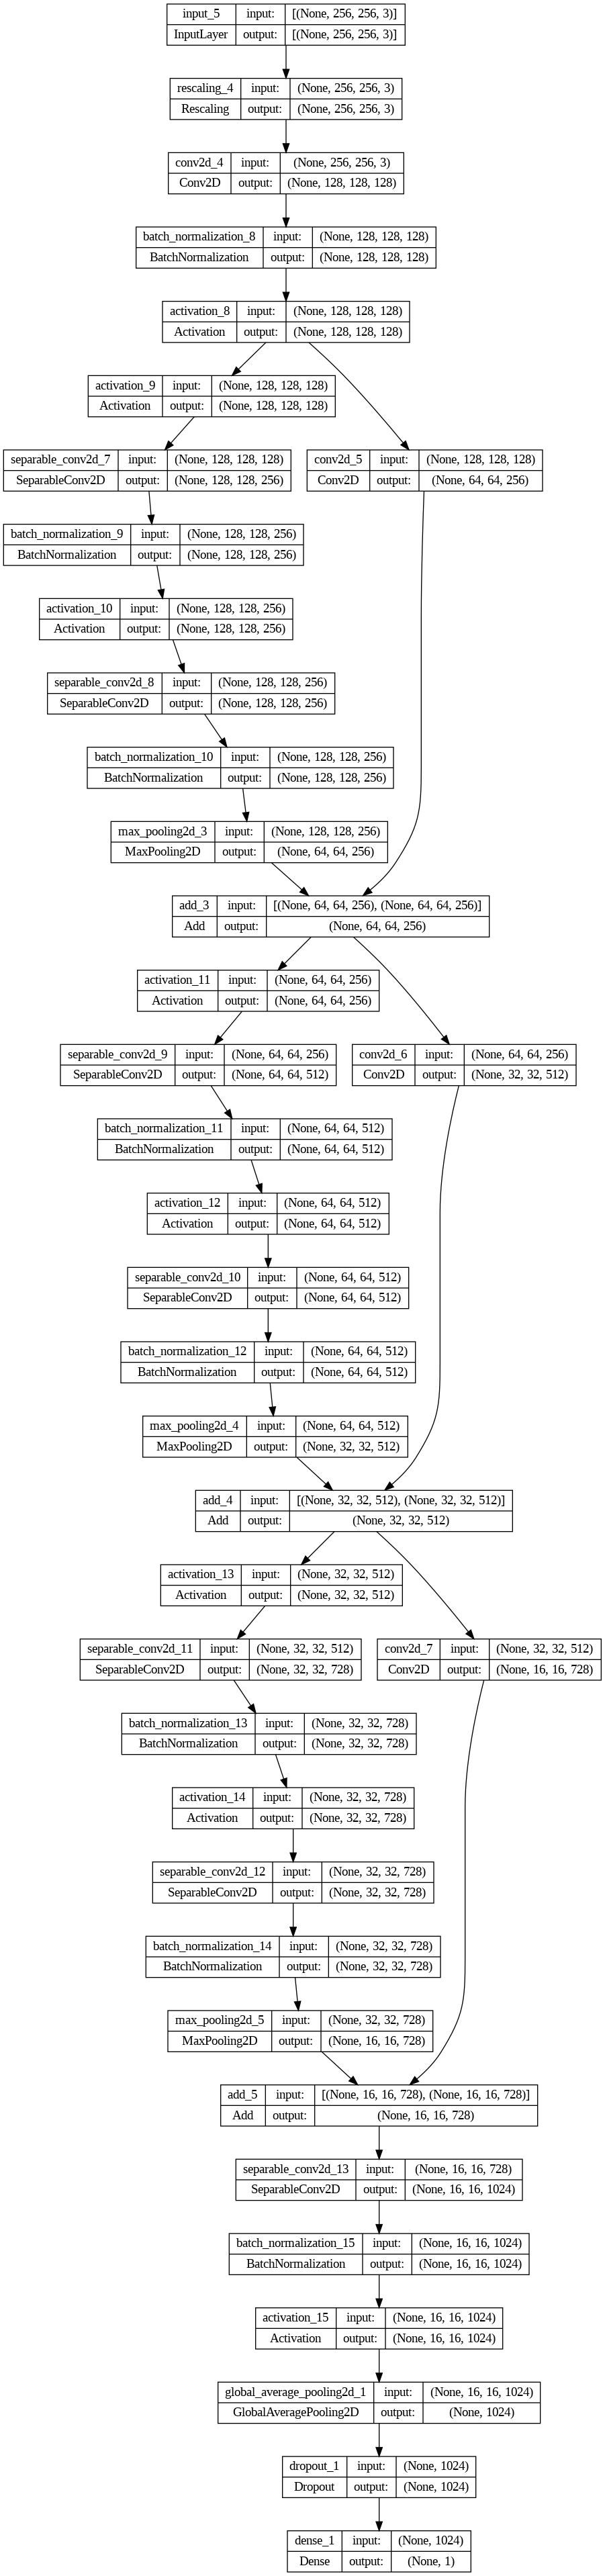

In [28]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [29]:

inputs = keras.Input(shape=image_size)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
...  # Rest of the model

Ellipsis

In [42]:
epochs = 50

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)


Epoch 1/50
56/56 [==============================] - 80s 1s/step - loss: 0.4245 - accuracy: 0.7927 - val_loss: 9.8341 - val_accuracy: 0.3614
Epoch 2/50
56/56 [==============================] - 73s 1s/step - loss: 0.4241 - accuracy: 0.7932 - val_loss: 5.7005 - val_accuracy: 0.3636
Epoch 3/50
56/56 [==============================] - 75s 1s/step - loss: 0.4238 - accuracy: 0.7986 - val_loss: 4.5298 - val_accuracy: 0.3670
Epoch 4/50
56/56 [==============================] - 82s 1s/step - loss: 0.4147 - accuracy: 0.8015 - val_loss: 2.0313 - val_accuracy: 0.4239
Epoch 5/50
56/56 [==============================] - 76s 1s/step - loss: 0.4085 - accuracy: 0.8063 - val_loss: 1.0909 - val_accuracy: 0.4045
Epoch 6/50
56/56 [==============================] - 76s 1s/step - loss: 0.4271 - accuracy: 0.7966 - val_loss: 6.5421 - val_accuracy: 0.3648
Epoch 7/50
56/56 [==============================] - 77s 1s/step - loss: 0.4134 - accuracy: 0.8026 - val_loss: 12.7905 - val_accuracy: 0.6386
Epoch 8/50
56/56 [=

In [44]:
model.save("/content/drive/MyDrive/New_quality_model_epoch50.h5", overwrite=True)

In [53]:
img = keras.utils.load_img(
    "/content/drive/MyDrive/testset/Images/normal/1_00000007.jpg", target_size=image_size
)
img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% 불량 and {100 * score:.2f}% 정상")

1/1 [==============================] - 0s 23ms/step
This image is 2.21% 불량 and 97.79% 정상
